In [1]:
import csv
import sys
#sys.path.insert(0, "../runit/")
sys.path.insert(0,"../python/")
from MC_Plots import style
from Sigma_study import energy

import numpy as np



import collections
import random
import matplotlib.pyplot as plt
from matplotlib import pyplot as pp
from scipy.stats import chisquare
from scipy.optimize import curve_fit
from sympy.solvers import solve
from sympy import Symbol
import os
import re
import fnmatch
import pandas as pd
import matplotlib.font_manager
from math import isnan


plt.rc('text', usetex=True)
import lmfit

from lmfit import Model

In [2]:
ps = style(figure_width = 9,
                 spine_color= 'Black')

In [3]:
en= energy(energy= 1500,edep_max=250)

In [4]:
#Eather calculate the sigmas or load them. 

#sigmas=en.get_sigmas() #Calculate the sigmas of the different simulations 


sigmas_arr=np.load('sigmas%i.npy'%en.energy)#load sigmas
sigmas=sigmas_arr.tolist()



In [5]:
#Fit fuction
def func (x,a,c):
    return (a/np.sqrt(x))+c

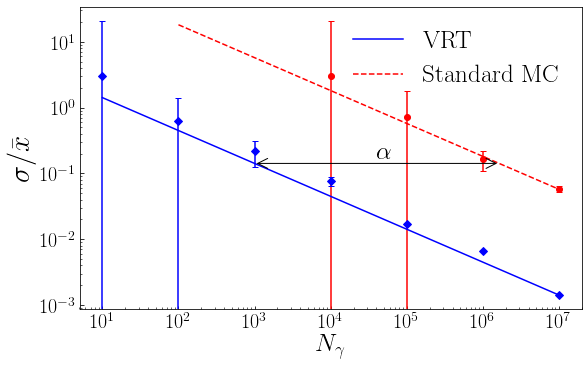

In [6]:
ns=en.find_ns()

#find first non nan value in non-vrt sigmas
non_vrt_start=sigmas[1].index(next(filter(lambda x: not isnan(x), sigmas[1]))) 
#non_vrt_start=3

#Get the x,y and error and couple them to make a combined fit.
y1 = np.array(sigmas[0])
y2 = np.array(sigmas[1][non_vrt_start:])#only take the non-zero sigmas (leave the small non-vrt out of the fit)
comboY = np.append(y1, y2)

x1 = np.array(ns)
x2 = np.array(ns[non_vrt_start:])
comboX = np.append(x1, x2)


#Calculate the error on the weight to use in the fit
s1=np.square(sigmas[0])*2
s2=np.square(sigmas[1][non_vrt_start:])*2
comboS = np.append(s1,s2)



#make do the fit
a,b,c=en.do_fit(sigmas=sigmas)


#Drawing part of making the plots
ps.latexify()
fig , ax=plt.subplots(1,1)


#set range of the fit-line just visual
xfit_vrt= range(ns[0],ns[-1])
xfit_nonvrt= range(ns[1],ns[-1])

#plot fit-lines
ax.plot(xfit_vrt,func(xfit_vrt,a,c),'-' , color="Blue")
ax.plot(xfit_nonvrt,func(xfit_nonvrt,b,c),'--',color="Red")

#plot the points with error bar
ax.errorbar(ns,y1, yerr=s1, fmt='D',color='Blue')
ax.errorbar(ns[3:],y2, yerr=s2, fmt='o',color="Red")

#calculate acceleration factor
acc_fac=(b/a)**2

#horizonthal line
ax.annotate("", xy=(ns[2], func(ns[2],a,c)), xytext=(ns[2]*acc_fac, func(ns[2],a,c)),
             arrowprops=dict(arrowstyle="<->"))# annotate because that scales better than arrow

x_point_alpha = np.sqrt(ns[2]*(ns[2]*acc_fac))#place alpha in the middel of the arrow

ax.text(x_point_alpha,func(ns[2],a,c),r'$\alpha$',color='black',fontsize=25,
        horizontalalignment='left',verticalalignment='bottom')


ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$\\\sigma / \bar{x}$',fontsize=29)

ax.set_xlabel('$N_{\gamma}$')
ax.legend(['VRT','Standard MC'],loc='upper right',frameon=False)

ps.format_axes(ax)

#plt.savefig('sigmaVSn_%i.pdf' %en.energy)

plt.show()